In [1]:
#raw_data folder, city_data.csv, ride_data.csv


In [2]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Load in csv
city_data = pd.read_csv("raw_data/city_data.csv")
#len(city_data)
city_data.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
# Load in csv
ride_data = pd.read_csv("raw_data/ride_data.csv")
#len(ride_data)
ride_data.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [5]:
merge_data_df = pd.merge(ride_data, city_data,how='outer', on='city' )
merge_data_df.head()
len(merge_data_df)
merge_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [6]:
#merge_group = merge_data_df.groupby('city')
#fair_av = merge_group['fare'].mean()
#fair_av.head()


In [22]:
#Average Fair per City $
city_group_fair = merge_data_df.groupby('city')
#city_group_fair
fair_avg = city_group_fair['fare'].mean()
fair_avg.head()
#len(fair_avg)

city
Alvarezhaven    23.928710
Alyssaberg      20.609615
Anitamouth      37.315556
Antoniomouth    23.625000
Aprilchester    21.981579
Name: fare, dtype: float64

In [81]:
#Average Fair per City $ URBAN
urban = merge_data_df[merge_data_df['type'].str.match('Urban')]
urban

city_group_fair_u = urban.groupby('city')
#city_group_fair
fair_avg_u = city_group_fair_u['fare'].mean()
fair_avg_u.head()
#len(fair_avg)
urban.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [82]:
#Average Fair per City $ Suburban
suburban = merge_data_df[merge_data_df['type'].str.match('Suburban')]
suburban

city_group_fair_s = suburban.groupby('city')
#city_group_fair
fair_avg_s = city_group_fair_s['fare'].mean()
fair_avg_s.head()
len(fair_avg)
suburban.head()

,city,date,fare,ride_id,driver_count,type
1625,Port James,2016-12-04 06:16:36,15.77,2259499336994,15,Suburban
1626,Port James,2016-12-04 06:16:36,15.77,2259499336994,3,Suburban
1627,Port James,2016-05-16 21:25:03,26.26,4051110168629,15,Suburban
1628,Port James,2016-05-16 21:25:03,26.26,4051110168629,3,Suburban
1629,Port James,2016-01-04 22:46:29,20.25,3994763896598,15,Suburban


In [83]:
#Average Fair per City $ Suburban
rural = merge_data_df[merge_data_df['type'].str.match('Rural')]
rural

city_group_fair_r = suburban.groupby('city')
#city_group_fair
fair_avg_r = city_group_fair_r['fare'].mean()
fair_avg_r.head()
len(fair_avg)
rural.head()

,city,date,fare,ride_id,driver_count,type
2282,Horneland,2016-07-19 10:07:33,12.63,8214498891817,8,Rural
2283,Horneland,2016-03-22 21:22:20,31.53,1797785685674,8,Rural
2284,Horneland,2016-01-26 09:38:17,21.73,5665544449606,8,Rural
2285,Horneland,2016-03-25 02:05:42,20.04,5729327140644,8,Rural
2286,Kinghaven,2016-05-18 23:28:12,20.53,6432117120069,3,Rural


In [23]:
#Total Number of Rides Per Cit
city_rides = city_group_fair['city'].count()
city_rides.head()
#len(city_rides)

city
Alvarezhaven    31
Alyssaberg      26
Anitamouth       9
Antoniomouth    22
Aprilchester    19
Name: city, dtype: int64

In [18]:
#Total Number of Drivers Per City
#drvr_cnt = city_group_fair['driver_count'].sum()
#city_group_fair
#drvr_cnt.head()
d_cnt = city_data.groupby('city')
new_count = d_cnt['driver_count'].sum()
new_count.head()

city
Alvarezhaven    21
Alyssaberg      67
Anitamouth      16
Antoniomouth    21
Aprilchester    49
Name: driver_count, dtype: int64

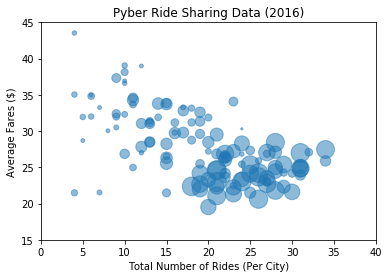

In [40]:
# use the scatter function
x = city_rides
y = fair_avg
z = new_count
plt.scatter(x, y, s=z*5, alpha=0.5)

# The X limits of our scatter plot is 0 to 1
plt.xlim(0, 40)

# The y limits of our scatter plot is 0 to 1
plt.ylim(15, 45)

# Create a title, x label, and y label for our chart
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fares ($)")

plt.show()



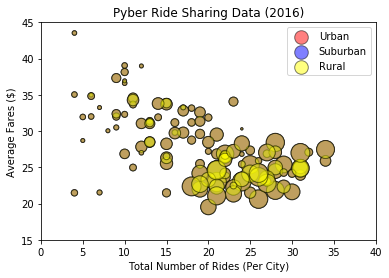

In [52]:
# use the scatter function
fig, ax = plt.subplots()
for color in ['red','blue','yellow']:
    l = ['Urban','Suburban','Rural']
    x = city_rides
    y = fair_avg
    z = new_count
    ax.scatter(x, y, c=color, s=z*5, alpha=0.5, label=color, edgecolors='black')
ax.legend(l)


# The X limits of our scatter plot is 0 to 1
plt.xlim(0, 40)

# The y limits of our scatter plot is 0 to 1
plt.ylim(15, 45)

# Create a title, x label, and y label for our chart
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fares ($)")

plt.show()


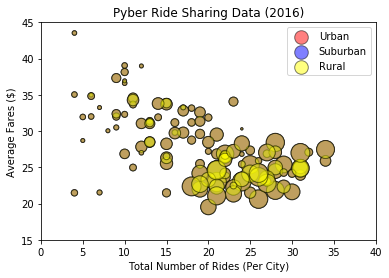

In [53]:
# use the scatter function
fig, ax = plt.subplots()
for color in ['red','blue','yellow']:
    l = ['Urban','Suburban','Rural']
    x = city_rides
    y = fair_avg
    z = new_count
    ax.scatter(x, y, c=color, s=z*5, alpha=0.5, label=color, edgecolors='black')
ax.legend(l)


# The X limits of our scatter plot is 0 to 1
plt.xlim(0, 40)

# The y limits of our scatter plot is 0 to 1
plt.ylim(15, 45)

# Create a title, x label, and y label for our chart
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fares ($)")

plt.show()

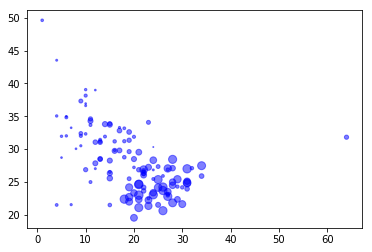

In [47]:
#N = 50
y = fair_avg
z = new_count
x = city_rides
colors = 'blue'
#area = np.pi * (15 * np.random.rand(y))**2  # 0 to 15 point radii

plt.scatter(x, y, s=z, c=colors, alpha=0.5)
plt.show()



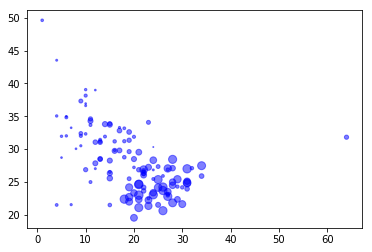

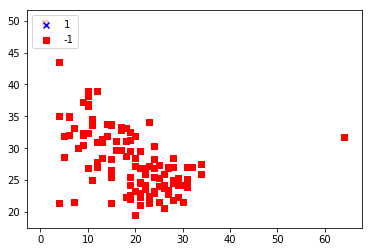

In [57]:
#N = 50
y = fair_avg
z = new_count
x = city_rides
colors = 'blue'
#area = np.pi * (15 * np.random.rand(y))**2  # 0 to 15 point radii

plt.scatter(x, y, s=z, c=colors, alpha=0.5)
plt.show()

plt.scatter(x,y, c='b', marker='x', label='1')
plt.scatter(x, y, c='r', marker='s', label='-1')
plt.legend(loc='upper left')
plt.show()